# Data Loading and Data Cleaning

In [158]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [22]:
print(os.getcwd())

c:\Users\acer\Documents\Belajar_Data\Fase_1


In [92]:
path_absolut = r"C:\Users\acer\Documents\Belajar_Data\Fase_1\data\sales_data.csv"

# Tambahkan parameter encoding='latin1'
df = pd.read_csv(path_absolut, encoding='latin1')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Melakukan Checking Tipe data pada Dataframe

In [55]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [62]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [65]:
dtype_float = df.select_dtypes(include=['float64'])
dtype_int = df.select_dtypes(include=['int64'])
dtype_obj = df.select_dtypes(include=['object'])

# Melihat Sebaran Data pada DataFrame

In [93]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# Melihat jumlah Null yang ada pada dataframe per kolomnya

In [94]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Melihat Kolom numeric dan Kategorical

In [95]:
print("Float Columns", list(dtype_float))

Float Columns ['PRICEEACH', 'SALES']


In [96]:
print("Int Columns", list(dtype_int))

Int Columns ['ORDERNUMBER', 'QUANTITYORDERED', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']


In [97]:
print("Object Columns", list(dtype_obj))

Object Columns ['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


# Cleaning Data

In [98]:
df.columns.to_list()

['ORDERNUMBER',
 'QUANTITYORDERED',
 'PRICEEACH',
 'ORDERLINENUMBER',
 'SALES',
 'ORDERDATE',
 'STATUS',
 'QTR_ID',
 'MONTH_ID',
 'YEAR_ID',
 'PRODUCTLINE',
 'MSRP',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [99]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [100]:
order_date

0        2/24/2003 0:00
1         5/7/2003 0:00
2         7/1/2003 0:00
3        8/25/2003 0:00
4       10/10/2003 0:00
             ...       
2818     12/2/2004 0:00
2819     1/31/2005 0:00
2820      3/1/2005 0:00
2821     3/28/2005 0:00
2822      5/6/2005 0:00
Name: ORDERDATE, Length: 2823, dtype: object

In [101]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [102]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# Membuat kolom baru yang berisikan nama bulan berdasarkan kolom ORDERDATE

In [103]:
df["MONTH"] = df["ORDERDATE"].dt.month_name()

In [104]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MONTH
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,May
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,July
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,August
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,December
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,January
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,March
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,March


In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
MONTH                  0
dtype: int64

In [112]:
wilayah = df[["TERRITORY", "COUNTRY"]]
pos_code = df["POSTALCODE"]
alamat = df[["ADDRESSLINE1", "ADDRESSLINE2"]]

In [ ]:
wilayah["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [118]:
wilayah["TERRITORY"].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [119]:
pos_code.unique()

array(['10022', '51100', '75508', '90003', nan, '94217', '59000',
       'N 5804', '75016', '3004', '94019', '97562', '44000', '51247',
       '21240', '4110', '70267', '5020', '2067', '50553', 'WX1 6LT',
       '28034', 'S-958 22', '28023', '79903', '4101', '71270', '69004',
       'V3F 2K1', '97823', '106-0032', '10100', 'S-844 67', '78000',
       '62005', '58339', '2060', 'H1J 1C3', '530-0003', '24067', '1734',
       'WX3 6FW', '31000', 'WA1 1DP', '8022', '91217', 'B-1180',
       'T2F 8M4', '51003', 'PO31 7PJ', '90110', '75012', '8010', '69045',
       '1227 MM', '13008', '50739', '1203', '42100', '60528', 'FIN-02271',
       '2', 'EC2 5NT', '8200', '92561', '41101', '67000', '83030',
       'N 0106', '24100', '3150', '97561', '80686', 'B-6000'],
      dtype=object)

In [128]:
alamat["ADDRESSLINE2"].notna().sum()

np.int64(302)

In [129]:
alamat["ADDRESSLINE1"].notna().sum()

np.int64(2823)

In [130]:
product = df[["PRICEEACH", "QUANTITYORDERED" ,"SALES", "PRODUCTCODE"]]

In [131]:
product

,PRICEEACH,QUANTITYORDERED,SALES,PRODUCTCODE
0,95.70,30,2871.00,S10_1678
1,81.35,34,2765.90,S10_1678
2,94.74,41,3884.34,S10_1678
3,83.26,45,3746.70,S10_1678
4,100.00,49,5205.27,S10_1678
...,...,...,...,...
2818,100.00,20,2244.40,S72_3212
2819,100.00,29,3978.51,S72_3212
2820,100.00,43,5417.57,S72_3212
2821,62.24,34,2116.16,S72_3212


In [134]:
total = df["SALES"].sum()
unit = df["QUANTITYORDERED"].sum()

In [135]:
print("Total Revenue:", total)
print("Total Unit:", unit)

Total Revenue: 10032628.85
Total Unit: 99067


In [136]:
revenue_per_unit = total / unit
print("Revenue per unit adalah:", revenue_per_unit)

Revenue per unit adalah: 101.27114831376744


In [139]:
df["REVENUEPERUNIT"] = df["SALES"] / df["QUANTITYORDERED"]

In [145]:
penjualan = df[["QUANTITYORDERED", "SALES", "PRICEEACH", "REVENUEPERUNIT"]]

In [146]:
penjualan

,QUANTITYORDERED,SALES,PRICEEACH,REVENUEPERUNIT
0,30,2871.00,95.70,95.70
1,34,2765.90,81.35,81.35
2,41,3884.34,94.74,94.74
3,45,3746.70,83.26,83.26
4,49,5205.27,100.00,106.23
...,...,...,...,...
2818,20,2244.40,100.00,112.22
2819,29,3978.51,100.00,137.19
2820,43,5417.57,100.00,125.99
2821,34,2116.16,62.24,62.24


Terdapat beberapa perbedaan pada PRICEEACH dengan REVENUEPERUNIT, menandakan terjadi beberapa penjualan dengan diskon

In [147]:
nilai_sama = (df["PRICEEACH"] == df["REVENUEPERUNIT"]).sum()

In [148]:
nilai_tidak_sama = (df["PRICEEACH"] != df["REVENUEPERUNIT"]).sum()

In [149]:
print("Total Nilai Sama", nilai_sama)
print("Total Nilai Tidak Sama", nilai_tidak_sama)

Total Nilai Sama 1164
Total Nilai Tidak Sama 1659


In [150]:
persentase_sama = nilai_sama / len(df)
persentase_tidak_sama = nilai_tidak_sama / len(df)


In [152]:
print("Persentase Nilai Sama", persentase_sama * 100)
print("Persentase Nilai Tidak Sama", persentase_tidak_sama * 100)

Persentase Nilai Sama 41.2327311370882
Persentase Nilai Tidak Sama 58.76726886291179


In [156]:
price = df["PRICEEACH"]
revenue = df["REVENUEPERUNIT"]

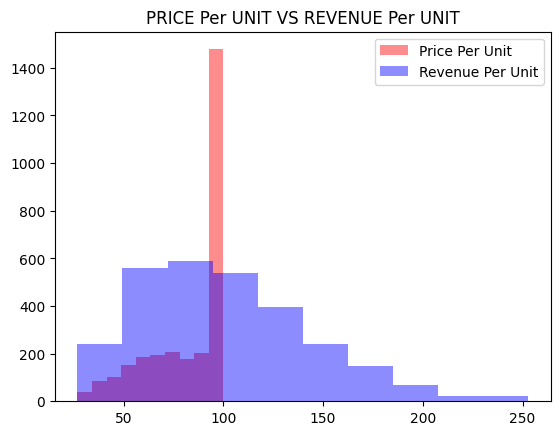

In [162]:
plt.hist(df["PRICEEACH"], bins=10, alpha=0.45, color='red')
plt.hist(df["REVENUEPERUNIT"], bins=10, alpha=0.45, color='blue')
plt.title("PRICE Per UNIT VS REVENUE Per UNIT")
plt.legend(['Price Per Unit', 'Revenue Per Unit'])
plt.show()

In [163]:
diskon = (df["PRICEEACH"] > df["REVENUEPERUNIT"]).sum()
markup = (df["PRICEEACH"] < df["REVENUEPERUNIT"]).sum()
persentase_diskon = diskon / len(df)
persentase_markup = markup /len(df)

print("Persentase terjadi diskon:", persentase_diskon * 100)
print("Persentase terjadi markup:", persentase_markup * 100)
print("Persentase Nilai Sama", persentase_sama * 100)
print("Persentase Nilai Tidak Sama", persentase_tidak_sama * 100)

Persentase terjadi diskon: 6.092809068366986
Persentase terjadi markup: 52.674459794544816
Persentase Nilai Sama 41.2327311370882
Persentase Nilai Tidak Sama 58.76726886291179


In [164]:
total_each = df["PRICEEACH"].sum()
total_revenue = df["REVENUEPERUNIT"].sum()

print("Total Normal:", total_each)
print("Total Revenue:", total_revenue)

Total Normal: 236168.07
Total Revenue: 285573.09877924295


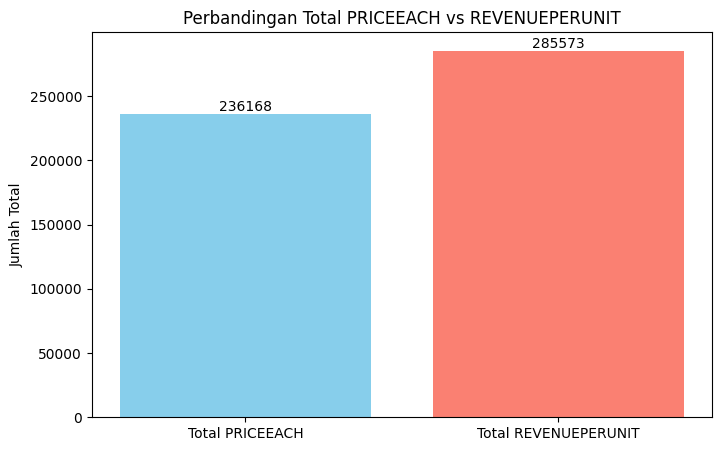

In [ ]:
labels = ['Total PRICEEACH', 'Total REVENUEPERUNIT']
values = [total_each, total_revenue]

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, values, color=['skyblue', 'salmon'])
ax.set_ylabel('Jumlah Total')
ax.set_title('Perbandingan Total PRICEEACH vs REVENUEPERUNIT')
ax.bar_label(bars)
plt.show()